# 분류의 개요
기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 방식  

<br>

분류의 알고리즘
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른 (또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

# 결정트리
- 규칙(if - else - )을 기반으로 모델을 학습함

![image](https://user-images.githubusercontent.com/70187490/128458197-b0c6cd9c-7353-4208-a000-8ceed4a6d3fc.png)

- 규칙 노드(Decision Node): 규칙 조건이 되는 노드
- 리프 노드(Leaf Node): 결정된 클래스 값
- 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성되는 가지(브랜치)  


규칙 조건이 만들 때마다 규칙 노드가 만들어짐  
많은 규칙이 있을 수록 모델이 복잡해지며 이는 과적합으로 이어짐  
  -> 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하됌

가능한 적은 결정 노드로 높은 예측 정확도를 가지려면?  
-> 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있는 결정 노드의 규칙이 필요  

<br>

결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦  
- 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고  
- 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 자식 트리를 내려가면서
- 이를 반복하는 형식으로 데이터 값을 예측함  

<br>

이러한 정보의 균일도를 측정하는 대표적인 방법으로는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있음
- 정보이득은 엔트로피라는 개념을 기반으로 함
- 엔트로피는 주어진 데이터 집합의 혼잡도를 의미
- 서로 다른 값이 섞여 있으면 엔트로피가 높고
- 같은 값이 섞여 있으면 엔트로피가 낮음
- 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값
- 정보 이득이 높은 속성을 기준으로 분할

<br>

- 지니 계수는 0이 가장 평등하고 1로 갈수록 불평등함
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

<br>

>즉 정보 이득이 높거나 지니계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할 한 뒤,   
>데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정   

- 사이킷런의 DecisionTreeClassifier의 Default 값은 지니 계수  
![image](https://user-images.githubusercontent.com/70187490/128492000-073cdf9a-cca3-4023-a5cc-554f9c9ebba5.png)

## 결정 트리 모델의 결정

|결정 트리 장점|결정 트리의 단점|
|:-|:-|
|쉽고 직관적이다.|과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요|
|피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음|

- 모든 것을 만족하는 규칙은 만들 수 없다고 인정하고 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움

## 결정 트리 파라미터
![image](https://user-images.githubusercontent.com/70187490/128495313-e3a9e5a8-1dca-4522-b41b-92873cac9ae3.png)

### 결정 트리 모델의 시각화

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris_data= load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf. predict(X_test)

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
               feature_names = iris_data.feature_names, impurity=True, filled=True)

0.9333333333333333


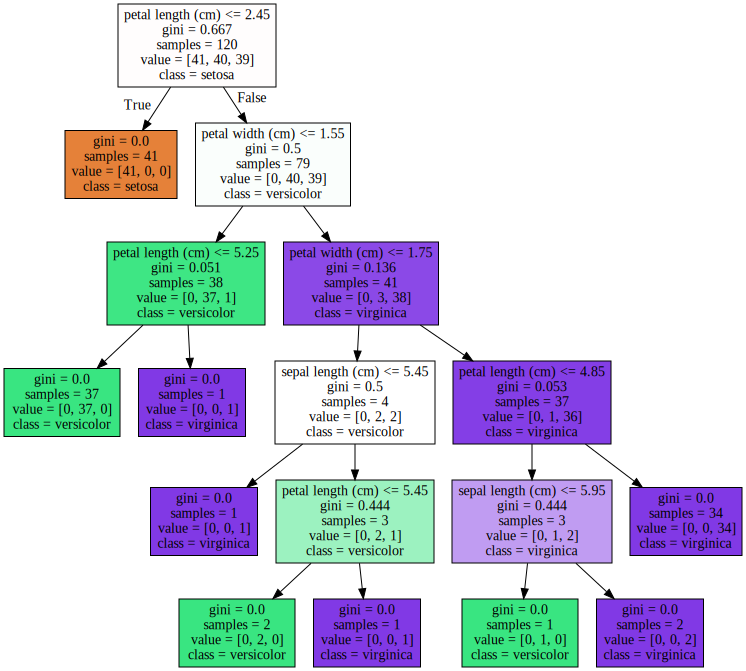

In [21]:
import graphviz

print(accuracy_score(pred, y_test))

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### DecisionTree 하이퍼 파라미터 조절 - max_depth

0.9333333333333333


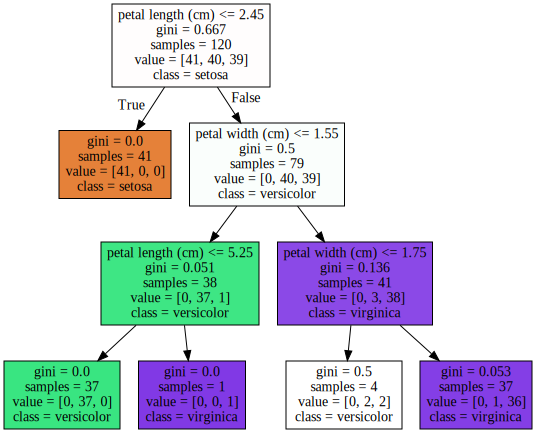

In [11]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, 
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_split

0.9333333333333333


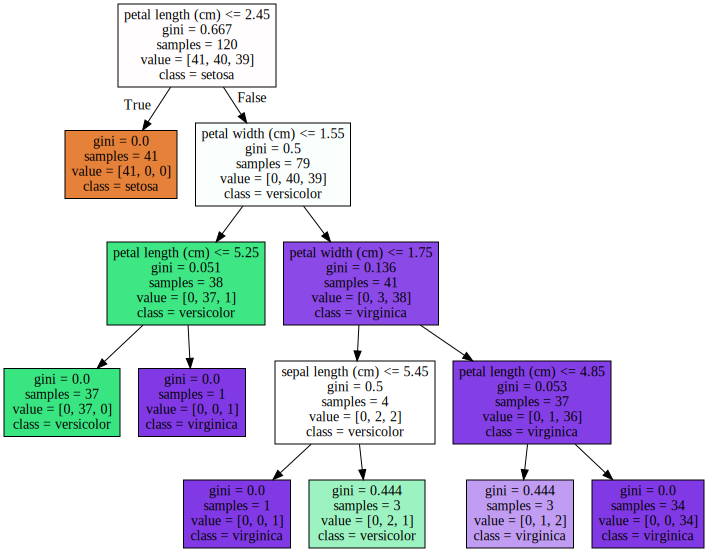

In [12]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris.target_names,
                feature_names = iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### DecisionTree 하이퍼파라미터 조절 - min_samples_leaf

0.9333333333333333


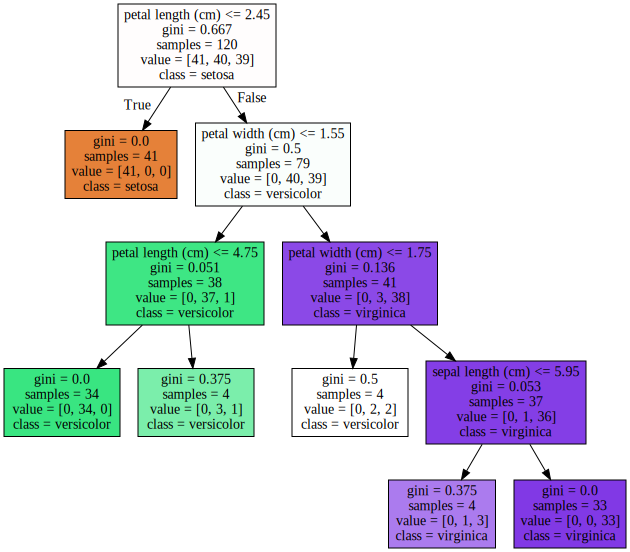

In [18]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names,
                feature_names= iris.feature_names, impurity=True, filled=True)

print(accuracy_score(pred, y_test))

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Feature importance 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


Featrue importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


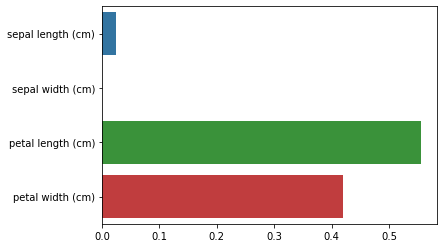

In [24]:
import seaborn as sns
import numpy as np

# feature importance 추출
print("Featrue importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);